# Projet LU2IN013: Exploration des Systèmes de Rating
Ce projet explore les systèmes de classement tels que Elo, Glicko et Glicko-2. 
L'objectif est de simuler des rencontres entre joueurs, d'analyser les distributions des compétences et des classements Elo, et de visualiser les résultats.

## Classes Utilisées
- **Joueur**: Modélise un joueur avec des compétences, un historique des parties et un classement Elo.
- **Jeu**: Représente un jeu avec un taux de hasard influençant les résultats.
- **Outils**: Contient des fonctions pour calculer les probabilités de victoire et mettre à jour les classements Elo.
- **Tournoi**: Implémente des tournois (round-robin et élimination directe).
- **Visu**: Fournit des outils de visualisation pour les compétences et les classements Elo.

### Modélisation : Sigmoïde
La probabilité de victoire est calculée à l'aide d'une fonction sigmoïde, ajustée par le taux de hasard du jeu.

## Tests et Visualisations
Nous allons tester les différentes fonctions et visualiser les résultats pour différents jeux et scénarios.

## Introduction aux Modélisations
### Première Modélisation
Dans ce modèle, les joueurs sont générés avec une force connue dès leur création. Les rencontres sont simulées en utilisant une fonction sigmoïde pour calculer les probabilités de victoire, en fonction de la différence de force entre les joueurs et du taux de hasard du jeu. Les classements Elo sont mis à jour après chaque match.

### Deuxième Modélisation
Dans ce modèle, la force des joueurs est inconnue. Les probabilités de victoire sont calculées en fonction de la différence d'Elo et du taux de hasard du jeu, sans utiliser directement la force réelle des joueurs.

## Importation des Modules Nécessaires

In [1]:
from modele_joueur import *
import numpy as np

## Test de la Classe `Joueur`

In [2]:
# Création d'un joueur
player = Joueur("Doe", "John", 25, [8, 7, 6, 5, 4], [], [], [1500])
player.__str__()

# Calcul de la force du joueur
print("Force du joueur:", player.force_joueur())

Nom : Doe
Prénom : John
Age : 25
Compétences : [8, 7, 6, 5, 4]
Historique des Elos : [1500]
Historique des parties : []
Historique des tournois : []
Force du joueur: 0.5333333333333333


## Test de la Fonction `generer_joueur`

In [3]:
# Génération d'un joueur aléatoire
random_player = generer_joueur("Random", "Player")
random_player.__str__()

Nom : Random
Prénom : Player
Age : 22
Compétences : [2.8, 10, 2.7, 1.6, 1.8]
Historique des Elos : [1500]
Historique des parties : []
Historique des tournois : []


## Visualisation des Compétences et des Elo

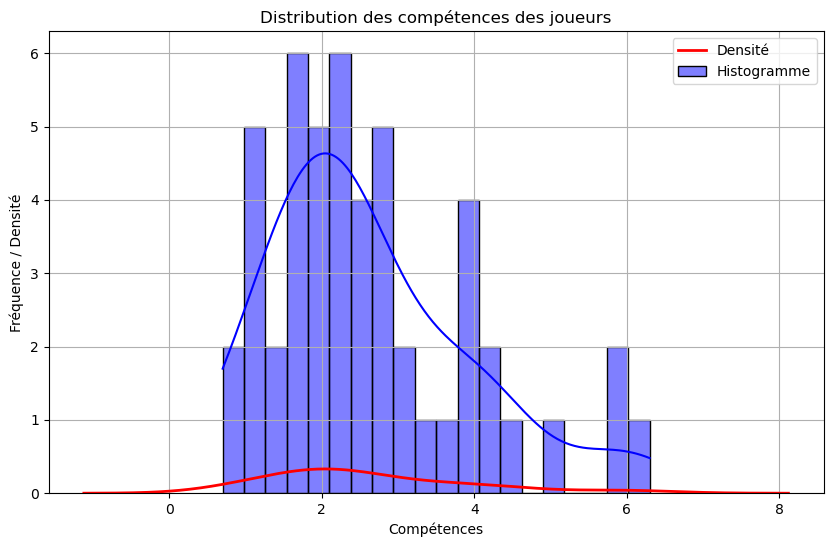

C:\Users\HJ7\new_proj\modele_joueur\visu.py:47: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(elo, color='orange', label='Densité', linewidth=2)


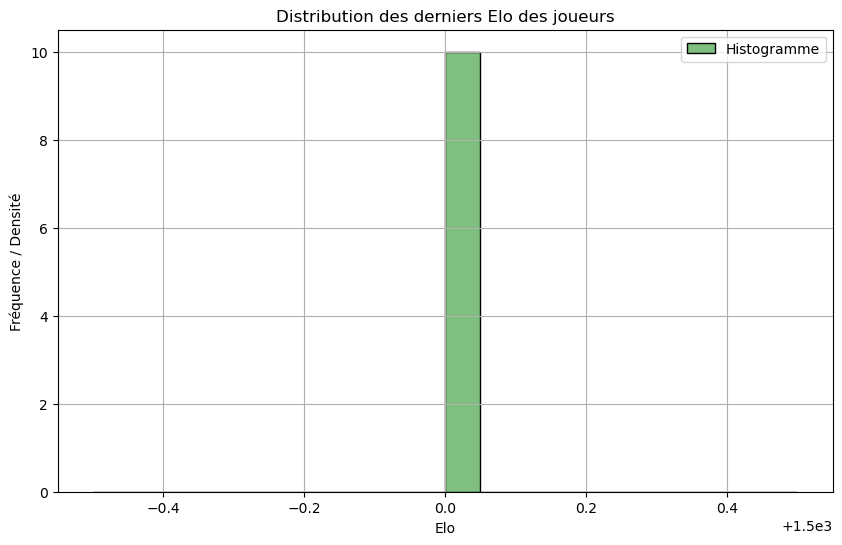

In [4]:
# Génération de plusieurs joueurs
players = [generer_joueur(f"Player{i}", f"Test{i}") for i in range(10)]

# Visualisation des compétences
tracer_competences(players)

# Visualisation des classements Elo
tracer_elo(players)

## Tests pour la Première Modélisation

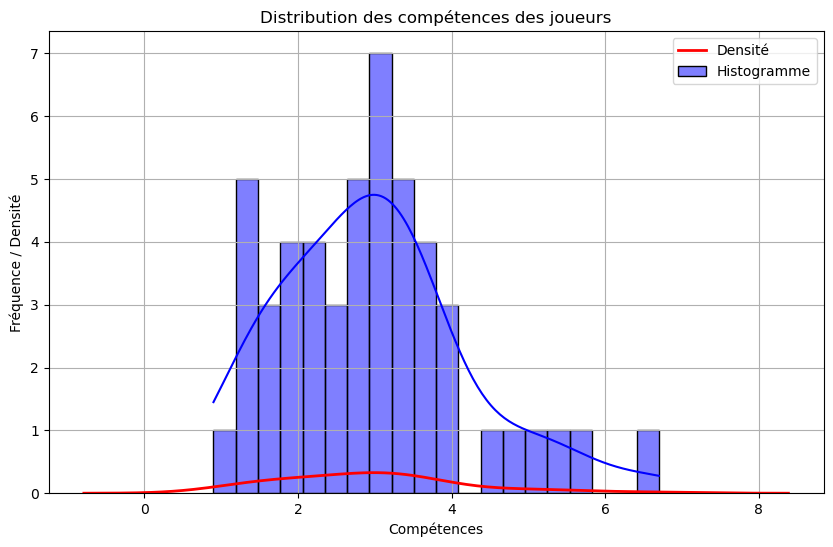

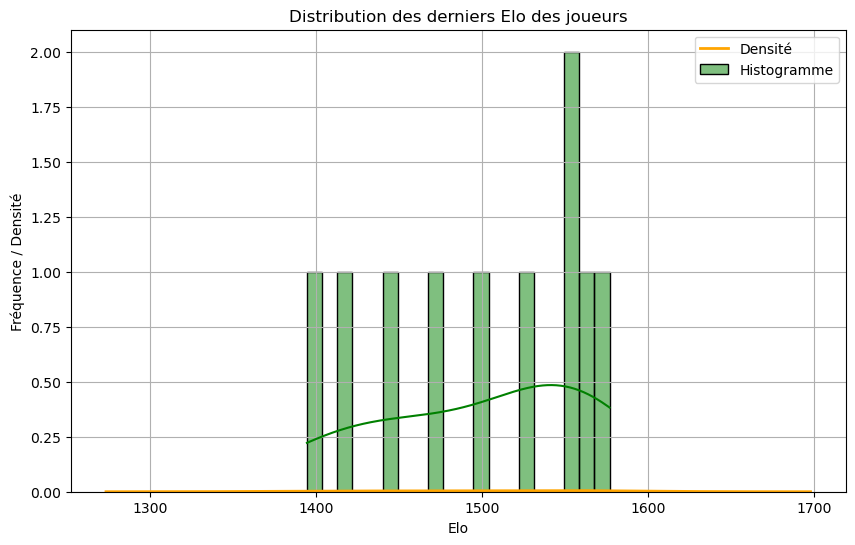

In [5]:
# Génération de joueurs
players_model1 = [generer_joueur(f"Player{i}", f"Test{i}") for i in range(10)]

# Création d'un jeu avec un taux de hasard modéré
game_model1 = Jeu("Chess", 0.3)

# Simulation d'un tournoi round-robin
round_robin_results_model1 = tournoi_round_robin(players_model1, game_model1)

# Visualisation des compétences et des classements Elo
tracer_competences(players_model1)
tracer_elo(players_model1)

## Tests pour la Deuxième Modélisation

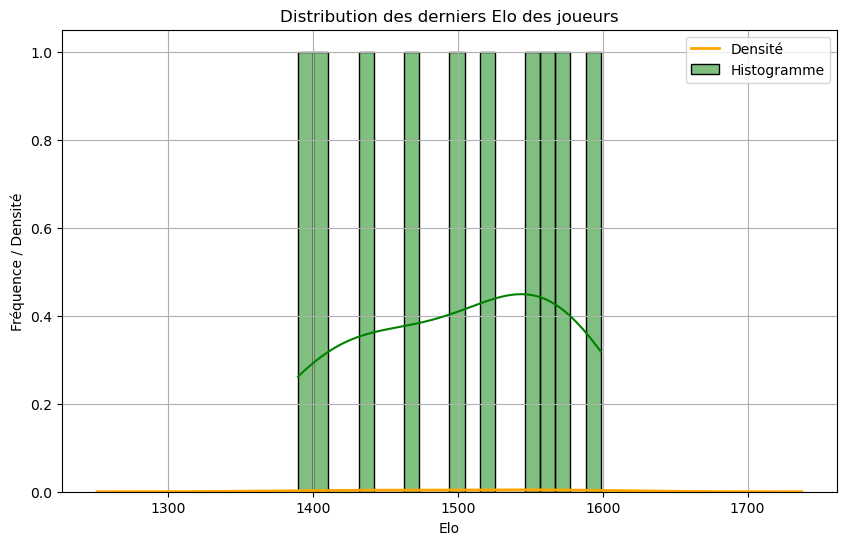

In [6]:
# Génération de joueurs
players_model2 = [generer_joueur(f"Player{i}", f"Test{i}") for i in range(10)]

# Création d'un jeu avec un taux de hasard élevé
game_model2 = Jeu("Poker", 0.7)

# Simulation d'un tournoi round-robin
round_robin_results_model2 = tournoi_round_robin_modele2(players_model2, game_model2)

# Visualisation des classements Elo
tracer_elo(players_model2)

## Simulation de Tournois

In [7]:
# Création d'un jeu
game = Jeu("Chess", 0.3)

# Simulation d'un tournoi round-robin
round_robin_results = tournoi_round_robin(players, game)
for player in round_robin_results:
    print(player.nom, player.prenom, player.histo_elo[-1])

# Simulation d'un tournoi à élimination directe
elimination_results = tournoi_eliminatoire(players, game)
for player in elimination_results:
    print(player.nom, player.prenom, player.histo_elo[-1])

Player0 Test0 1601.7736193209603
Player3 Test3 1580.1753360598252
Player1 Test1 1561.1453401374326
Player7 Test7 1532.2406232662279
Player4 Test4 1520.1284295680368
Player8 Test8 1490.1284295680368
Player5 Test5 1466.2988237520221
Player9 Test9 1436.661517854985
Player6 Test6 1408.8397575589793
Player2 Test2 1402.608122913494
tour 1:
Player7 Test7 vs Player0 Test0
Player9 Test9 vs Player5 Test5
Player3 Test3 vs Player2 Test2
Player4 Test4 vs Player8 Test8
Player6 Test6 vs Player1 Test1
tour 2:
Player5 Test5 vs Player4 Test4
Player0 Test0 vs Player1 Test1
tour 3:
Player3 Test3 vs Player0 Test0
tour 4:
Player4 Test4 vs Player0 Test0
Le gagnant du tournoi est Player0 Test0 avec 1653.1815732224593 Elo
Player0 Test0 1653.1815732224593
Player4 Test4 1538.3715897989366
Player3 Test3 1574.7315319076476
Player1 Test1 1560.2925806969542
Player5 Test5 1466.8652212258792
Player6 Test6 1396.6026340314518
Player8 Test8 1475.1284295680368
Player2 Test2 1393.8684624306957
Player9 Test9 1421.6965411246

## Comparaison des Modélisations

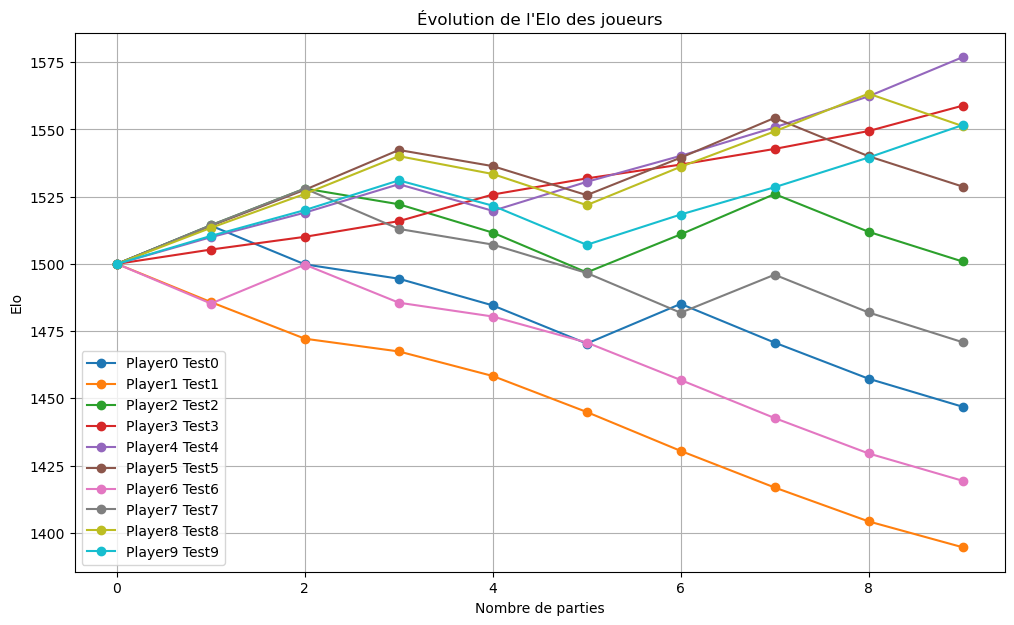

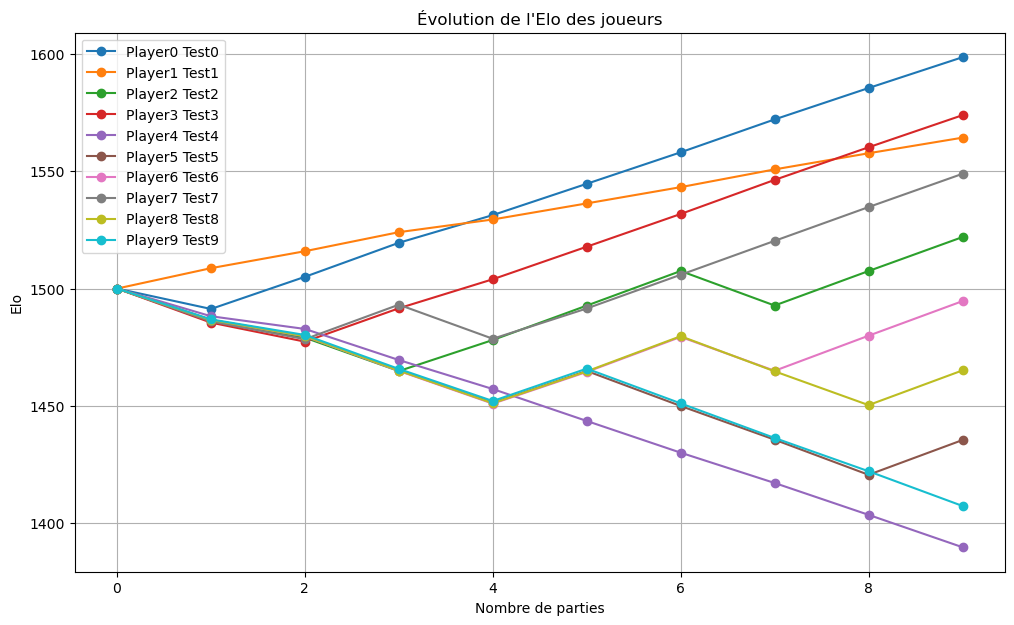

In [8]:
# Comparaison des distributions des classements Elo
tracer_comparaison_evolution_elo(players_model1)
tracer_comparaison_evolution_elo(players_model2)

## Évolution des Classements Elo

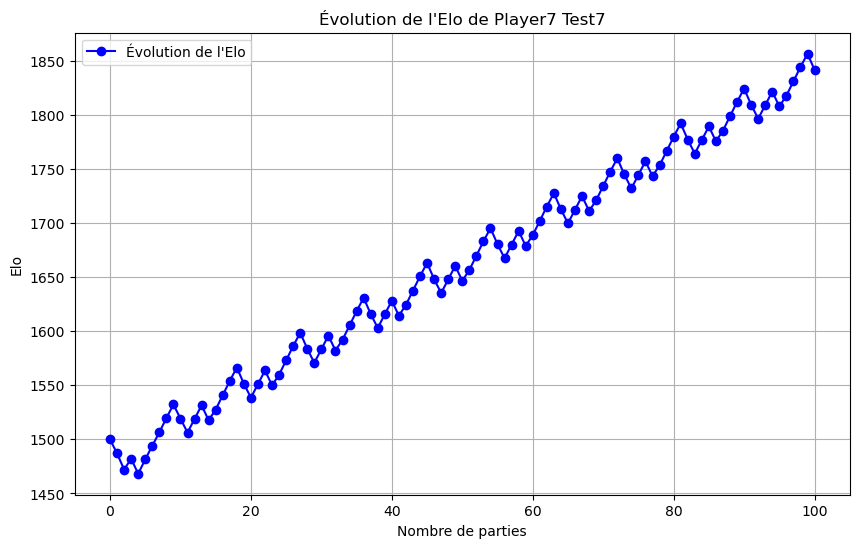

In [9]:
# Simulation de plusieurs tournois
for _ in range(10):
    tournoi_round_robin(players, game)

# Visualisation de l'Evolution de l'Elo pour le joueur 1
tracer_evolution_elo(players[0])

## Tests pour Différents Jeux avec Variation du Taux de Hasard


Tests pour Jeu Faible Hasard avec taux de hasard 0.1


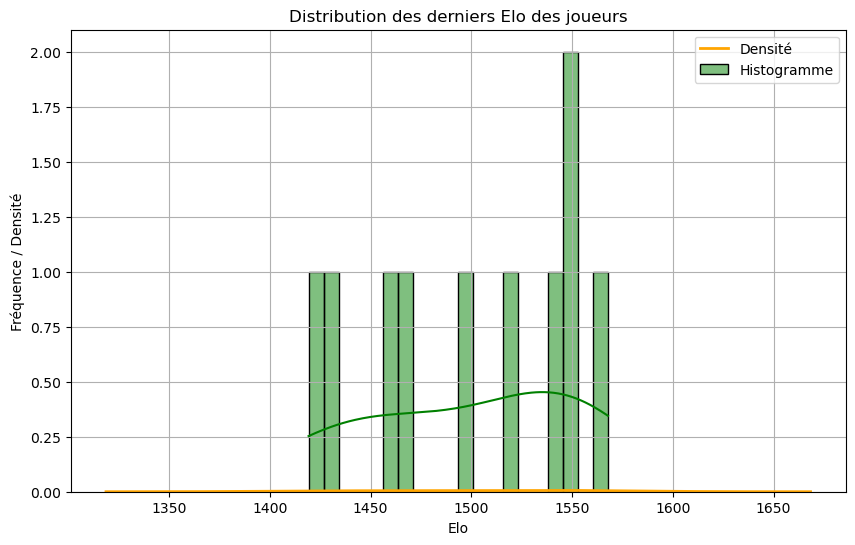

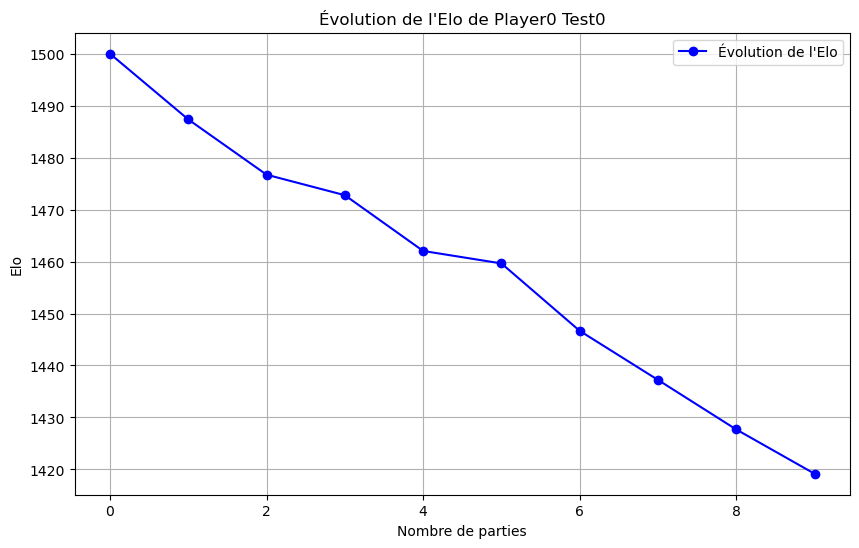


Tests pour Jeu Modéré Hasard avec taux de hasard 0.5


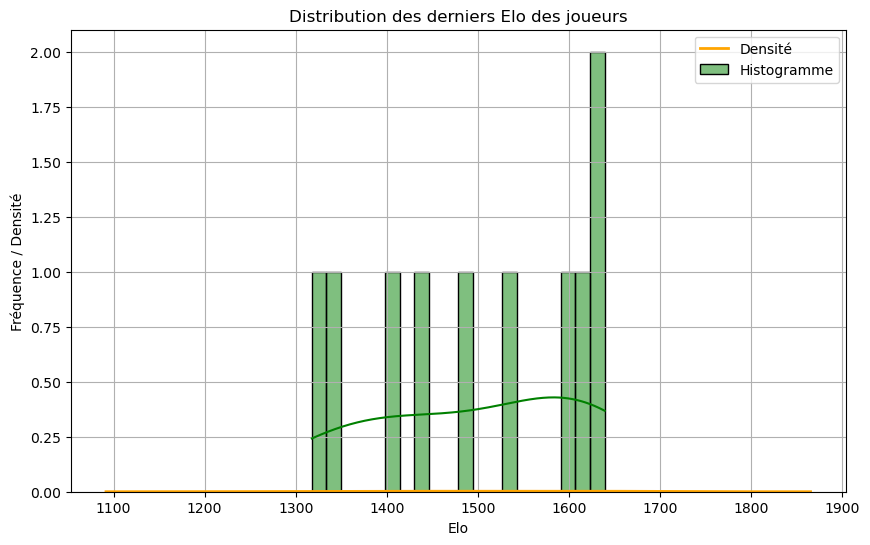

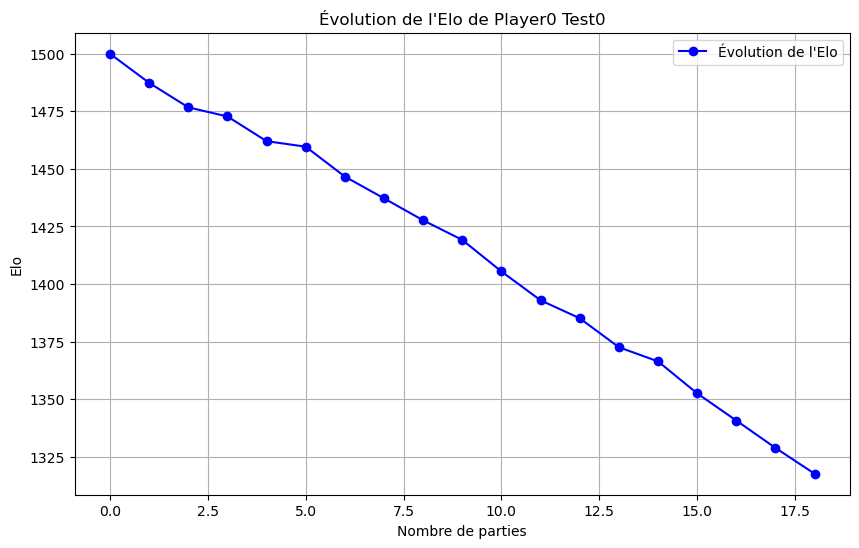


Tests pour Jeu Élevé Hasard avec taux de hasard 0.9


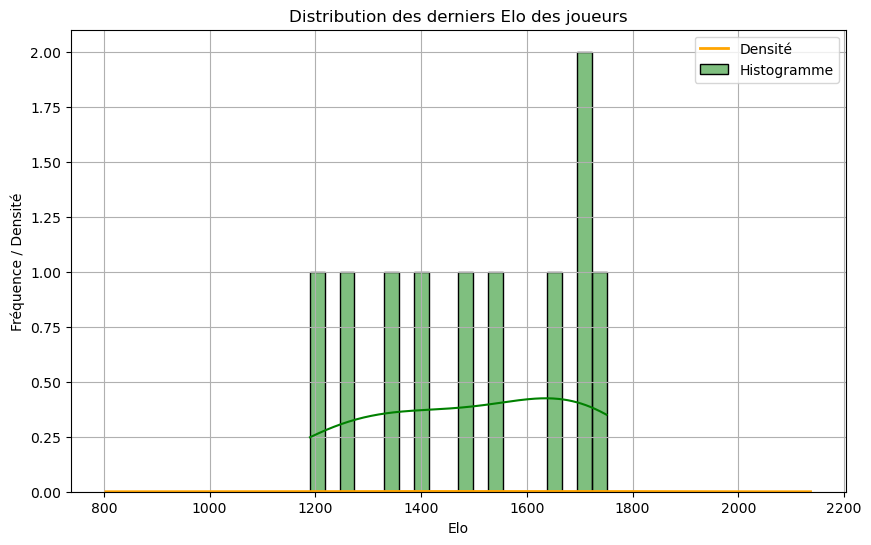

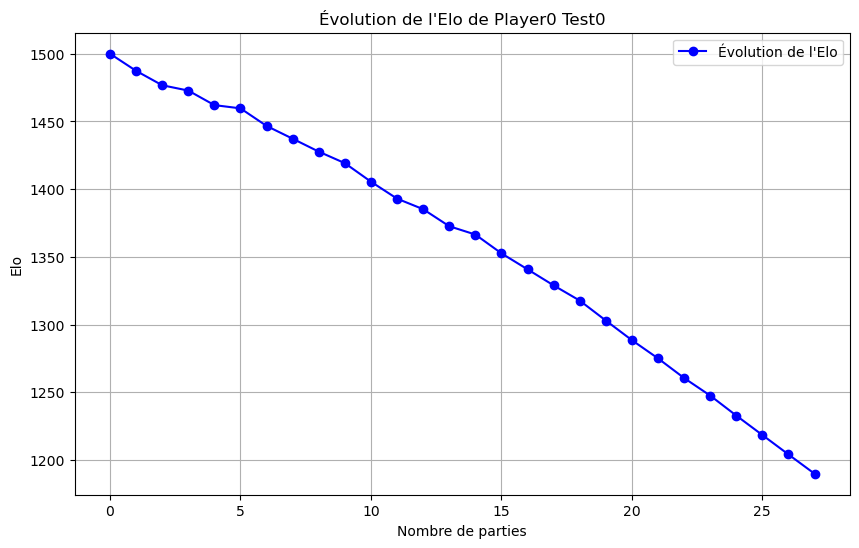

In [10]:
# Création de jeux avec différents taux de hasard
games = [
    Jeu("Jeu Faible Hasard", 0.1),
    Jeu("Jeu Modéré Hasard", 0.5),
    Jeu("Jeu Élevé Hasard", 0.9)
]

# Génération de joueurs
players = [generer_joueur(f"Player{i}", f"Test{i}") for i in range(10)]

# Tests pour chaque jeu
for game in games:
    print(f"\nTests pour {game.nom} avec taux de hasard {game.taux_de_hasard}")

    # Simulation d'un tournoi round-robin
    round_robin_results = tournoi_round_robin(players, game)

    # Visualisation des classements Elo
    tracer_elo(players)

    # Suivi de l'évolution de l'Elo pour un joueur
    tracer_evolution_elo(players[0])

## Visualisation de la corrélation Elo-Force

## 1er modèle


Tests pour Jeu Faible Hasard avec taux de hasard 0.1


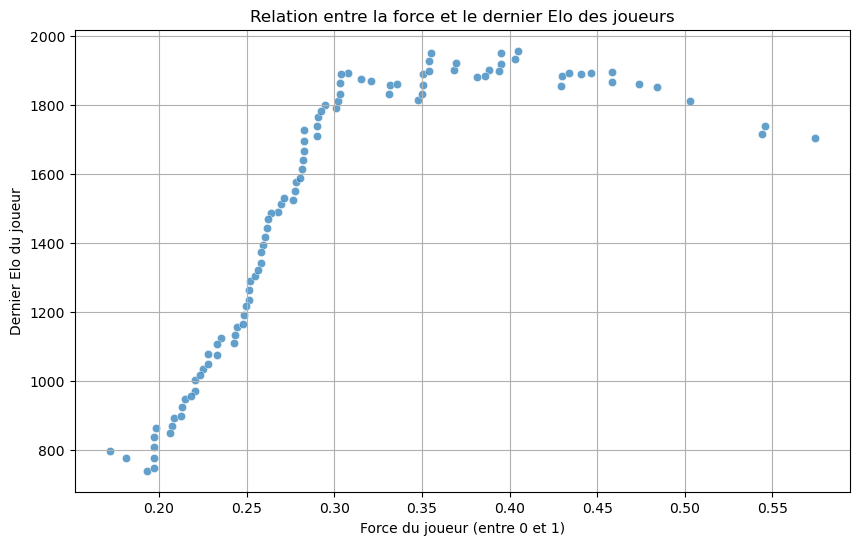


Tests pour Jeu Modéré Hasard avec taux de hasard 0.5


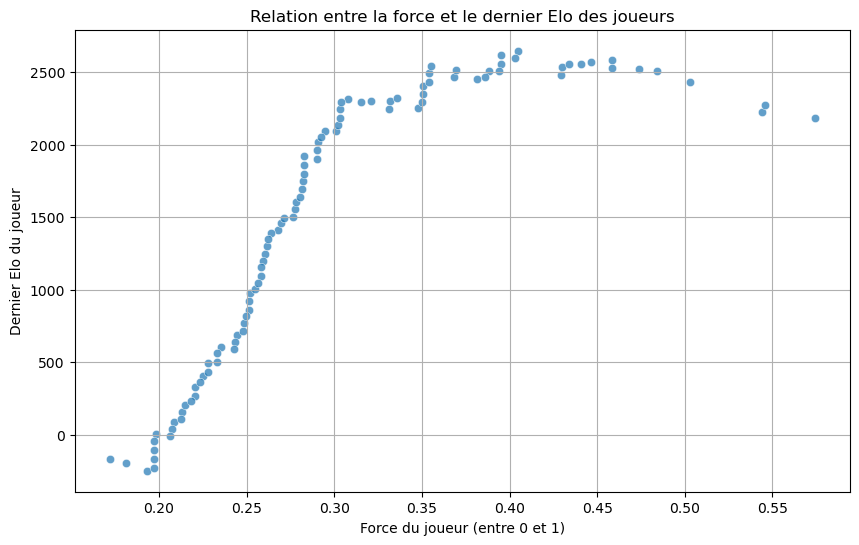


Tests pour Jeu Élevé Hasard avec taux de hasard 0.9


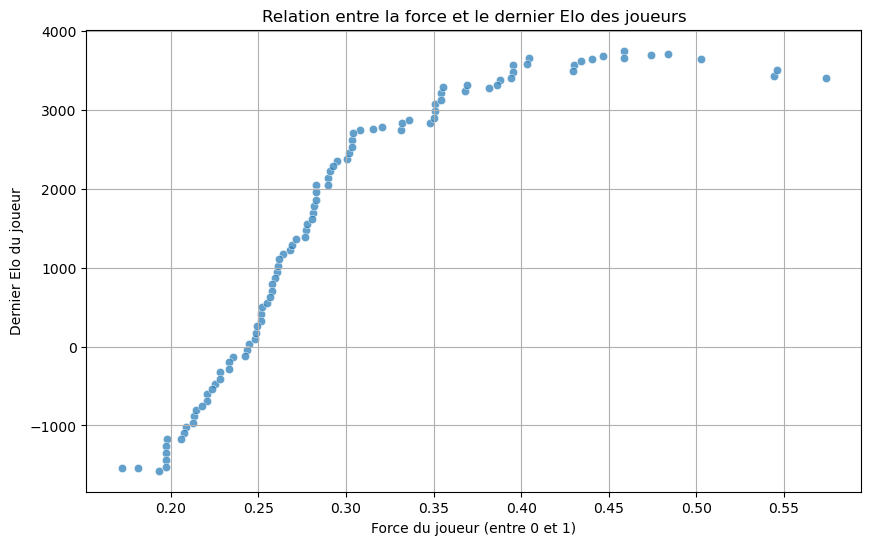

In [17]:
# Création de jeux avec différents taux de hasard
games = [
    Jeu("Jeu Faible Hasard", 0.1),
    Jeu("Jeu Modéré Hasard", 0.5),
    Jeu("Jeu Élevé Hasard", 0.9)
]

# Génération de joueurs
players = [generer_joueur(f"Player{i}", f"Test{i}") for i in range(100)]

# Tests pour chaque jeu
for game in games:
    print(f"\nTests pour {game.nom} avec taux de hasard {game.taux_de_hasard}")

    # Simulation d'un tournoi round-robin
    round_robin_results = tournoi_round_robin(players, game)

    # Visualisation de la corrélation Elo-Force
    tracer_force_elo(players)

## 2eme modèle


Tests pour Jeu Faible Hasard avec taux de hasard 0.1


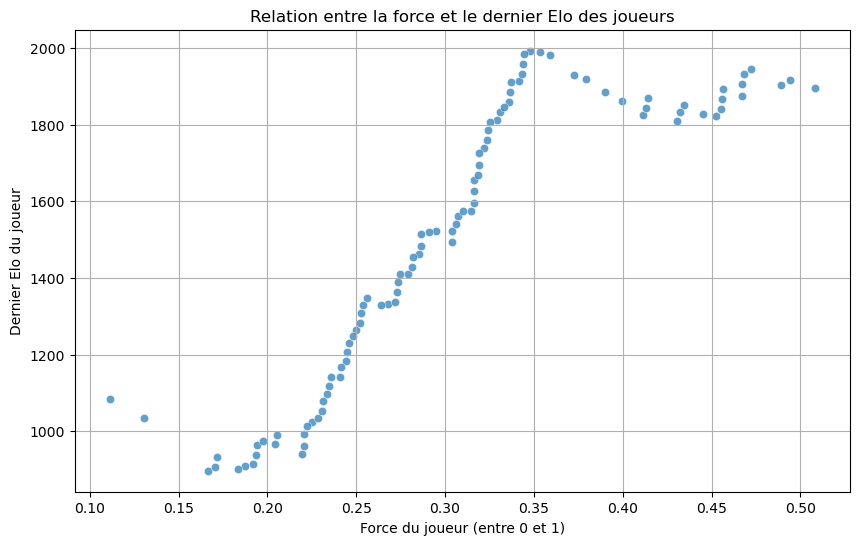


Tests pour Jeu Modéré Hasard avec taux de hasard 0.5


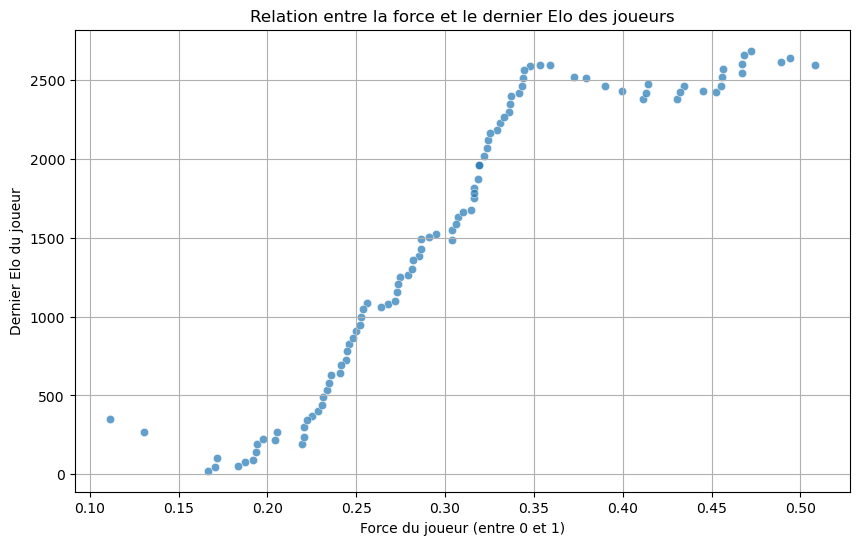


Tests pour Jeu Élevé Hasard avec taux de hasard 0.9


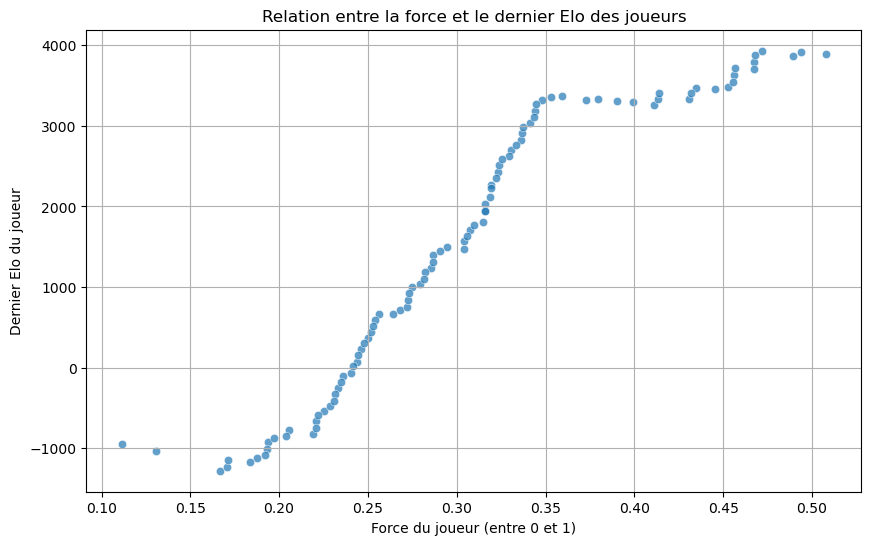

In [18]:
# Création de jeux avec différents taux de hasard
games = [
    Jeu("Jeu Faible Hasard", 0.1),
    Jeu("Jeu Modéré Hasard", 0.5),
    Jeu("Jeu Élevé Hasard", 0.9)
]

# Génération de joueurs
players = [generer_joueur(f"Player{i}", f"Test{i}") for i in range(100)]

# Tests pour chaque jeu
for game in games:
    print(f"\nTests pour {game.nom} avec taux de hasard {game.taux_de_hasard}")

    # Simulation d'un tournoi round-robin
    round_robin_results = tournoi_round_robin_modele2(players, game)

    # Visualisation de la corrélation Elo-Force
    tracer_force_elo(players)